<a href="https://colab.research.google.com/github/moey920/NLP/blob/master/Pre_trained_Word_Embedding_GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)
이번엔 케라스의 임베딩 층(embedding layer)과 사전 훈련된 워드 임베딩(pre-trained word embedding)을 가져와서 사용하는 것을 비교해봅니다. 자연어 처리를 하려고 할 때 갖고 있는 훈련 데이터의 단어들을 임베딩 층(embedding layer)을 구현하여 임베딩 벡터로 학습하는 경우가 있습니다. 케라스에서는 이를 Embedding()이라는 도구를 사용하여 구현합니다.

그런데 위키피디아 등과 같은 방대한 코퍼스를 가지고 Word2vec, FastText, GloVe 등을 통해서 이미 미리 훈련된 임베딩 벡터를 불러오는 방법을 사용하는 경우도 있습니다. 이는 현재 갖고 있는 훈련 데이터를 임베딩 층으로 처음부터 학습을 하는 방법과는 대조됩니다.

# 케라스 임베딩 층(Keras Embedding layer)
케라스는 훈련 데이터의 단어들에 대해 워드 임베딩을 수행하는 도구 Embedding()을 제공합니다. Embedding()은 인공 신경망 구조 관점에서 임베딩 층(embedding layer)을 구현합니다.


## 1) 임베딩 층은 룩업 테이블이다.
임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.

어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터

임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됩니다. 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됩니다. 그리고 이 밀집 벡터를 임베딩 벡터라고 부릅니다.

정수를 밀집 벡터 또는 임베딩 벡터로 맵핑한다는 것은 어떤 의미일까요? 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있습니다. 그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가집니다.

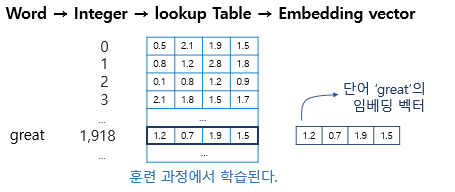



위의 그림은 단어 great이 정수 인코딩 된 후 테이블로부터 해당 인덱스에 위치한 임베딩 벡터를 꺼내오는 모습을 보여줍니다. 위의 그림에서는 임베딩 벡터의 차원이 4로 설정되어져 있습니다. 그리고 단어 great은 정수 인코딩 과정에서 1,918의 정수로 인코딩이 되었고 그에 따라 단어 집합의 크기만큼의 행을 가지는 테이블에서 인덱스 1,918번에 위치한 행을 단어 great의 임베딩 벡터로 사용합니다. 이 임베딩 벡터는 모델의 입력이 되고, 역전파 과정에서 단어 great의 임베딩 벡터값이 학습됩니다.

룩업 테이블의 개념을 이론적으로 우선 접하고, 처음 케라스를 배울 때 어떤 분들은 임베딩 층의 입력이 원-핫 벡터가 아니어도 동작한다는 점에 헷갈려 합니다. 케라스는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 한번 더 바꾸고나서 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인덱스로만 바꾼채로 임베딩 층의 입력으로 사용해도 룩업 테이블 된 결과인 임베딩 벡터를 리턴합니다.

케라스의 임베딩 층 구현 코드를 봅시다.

In [0]:
# 아래 인자는 영수증 데이터셋을 기반으로 판단한 숫자입니다.
# v = Embedding(50000, 128, input_length=120)
# vocab_size = 20000
# output_dim = 128
# input_length = 500

임베딩 층은 다음과 같은 세 개의 인자를 받습니다.

- vocab_size : 텍스트 데이터의 전체 단어 집합의 크기입니다.
- output_dim : 워드 임베딩 후의 임베딩 벡터의 차원입니다.
- input_length : 입력 시퀀스의 길이입니다. 만약 갖고있는 각 샘플의 길이가 500개의 단어로 구성되어있다면 이 값은 500이 됩니다.

Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 실수 텐서를 리턴합니다. 케라스의 임베딩 층(embedding layer)을 사용하는 간단한 실습을 진행해보겠습니다.

## 2) 임베딩 층 사용하기

임베딩 층을 복습해보겠습니다. 영수증 데이터셋을 불러와서 작업해보겠습니다.

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 훈련파일, 테스트파일 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_file_link = '/content/drive/My Drive/datt/CNN_텍스트분류_정답_수정.txt'

In [101]:
# 불러온 데이터를 보면 id, document, label로 구분이 되어있습니다.
train_data = pd.read_csv(train_file_link, header = 0, delimiter = '\t', quoting = 3)
train_data.head(10)

,id,document,label
0,1,ㅣ 서울특별시 마포구 월드컵로 74,2
1,2,홍인숙,16
2,3,함정한,16
3,4,사업자번호: | 629 - 35 - 00564,3
4,5,히여 매장 방문 시 해당액 해당금액 이상의 이,0
5,6,영업일자 :2020/02 /28,4
6,7,히여 매장 방문 시 해당금액 이상의 상품으로,0
7,8,히어 매장 방문 시 해당금에 이상의 상품으로,0
8,9,히어 매장 방문 시 해당금액 이상의 상품으로,0
9,10,히 이 부분교한선교회에의한 환된,0


In [0]:
test_file_link = '/content/drive/My Drive/캐시카우_노하람인턴_공유폴더/OCR result text Classification/testdataset2.txt'

In [7]:
test_data = pd.read_csv(test_file_link, header = 0, delimiter = '\t', quoting = 3)
test_data.head(10)

,id,document,label
0,1.0,CJ올리브영 신사점,NaN
1,2.0,특별시 강남구 도산대로 116 논현빌딩,NaN
2,3.0,1층,NaN
3,4.0,"""0098101574 구창근 , TEL : 02 -516 - 5290""",NaN
4,5.0,2019 - 12-31 21 : 15 : 54 POS : 1001- 00255 문준휘,NaN
5,6.0,고객센터 : 1577 - 4887 www .oliveyoung . co .kr,NaN
6,7.0,교환 판매가능한 / 환불은정상 결제일로부터 ( 15일(1월,NaN
7,8.0,*수단과 다 환불 구매영수증 미개봉 지참 후) 에 이해 결제했던,NaN
8,9.0,15일 ) 대,NaN
9,10.0,가능 / 결제수단 변경은 구매매장 깨진 모시 가능,NaN


In [8]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 231kB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 2.4MB 58.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


### 전처리작업(토크나이징)

In [0]:
import re
import json
from konlpy.tag import Okt

from tqdm import tqdm

In [0]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거. + 영어 소문자, 대문자, 숫자도 제외
    # 일단 OCR 결과의 원형을 학습시키기 위해 정규표현식을 사용하지 않고 학습시켜보겠습니다.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\\s]", " ",  review)
    #review_text = re.sub(" ", "",  review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
   
    return word_review

In [104]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', 
              '주', '등', '한', '(', ')', '/', '*', '=', 'E', '|', '-', '.', ',', 'II', 'لالالالا', 
              '|||||||||', 'iii', '|||', '. ', '.', '"', ' )', '[', ']']
okt = Okt()
clean_train_review = []

for review in tqdm(train_data['document']):
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

100%|██████████| 39371/39371 [00:19<00:00, 2014.07it/s]


In [0]:
sentences = clean_train_review
y_train = train_data['label']

문장과 레이블 데이터를 만들었습니다. 긍정인 문장은 레이블 1, 부정인 문장은 레이블이 0입니다.

In [106]:
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

12301


케라스의 Tokenizer()를 사용하여 토큰화를 시켰습니다.

In [107]:
X_encoded = t.texts_to_sequences(sentences)
print(X_encoded)

[[4500, 153, 548, 2905, 45, 764], [824, 2906], [2907], [2908, 16, 4501, 241, 4502], [642, 225, 11, 21, 4, 55, 151, 55, 8, 23], [4503, 297, 119, 83, 179], [642, 225, 11, 21, 4, 55, 8, 23, 5, 86], [2909, 11, 21, 4, 55, 155, 17, 23, 5, 86], [2909, 11, 21, 4, 55, 8, 23, 5, 86], [642, 27, 226, 2910, 230, 765, 185, 403], [642, 27, 226, 2910, 230, 765, 185, 403], [4504, 182, 310, 120, 36, 87, 4505], [2911, 32, 2, 95, 33, 2, 45, 100], [2912, 4, 1, 3, 105, 1, 3, 6, 76, 85, 54, 157, 183, 15], [79, 22, 24, 72, 71, 65, 13, 5, 4, 1, 1, 3, 3, 12, 12], [79, 22, 24, 5, 1, 3, 12], [79, 2244], [79, 72, 71, 65, 13, 4, 1, 3, 12], [79, 72, 71, 65, 13, 4, 1, 3, 12], [79, 72, 65, 28, 226, 4506, 340], [79, 32, 2, 95, 33, 2, 45, 100], [79, 11, 21, 4, 10], [79, 825], [187, 193, 2245, 2913], [4507, 4508], [187, 193, 2246, 643, 1176, 60, 53], [187, 193, 2247, 1805, 503, 1318, 60, 53], [4509, 392, 4510], [79, 91, 3, 6, 26, 63, 49, 47, 11, 92], [79, 91, 3, 58, 7, 6, 26, 234, 13, 79, 11, 21, 4, 10], [79, 106, 2, 23,

각 문장에 대해서 정수 인코딩을 수행합니다.

In [108]:
max_len=max(len(l) for l in X_encoded)
print(max_len)

45


문장 중에서 가장 길이가 긴 문장의 길이는 45입니다.

In [109]:
X_train=pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train=np.array(y_train)
print(X_train)
print(y_train)

[[ 4500   153   548 ...     0     0     0]
 [  824  2906     0 ...     0     0     0]
 [ 2907     0     0 ...     0     0     0]
 ...
 [12298     0     0 ...     0     0     0]
 [12299     0     0 ...     0     0     0]
 [12300     0     0 ...     0     0     0]]
[ 2 16 16 ... 12 12 12]


In [0]:
input_data = X_train
label_data = y_train
word_index = t.word_index

In [18]:
word_index

{'교환': 1,
 '포인트': 2,
 '환불': 3,
 '시': 4,
 '상품': 5,
 '결제': 6,
 '영수증': 7,
 '금액': 8,
 '1': 9,
 '가능': 10,
 '매장': 11,
 '불가': 12,
 '차다': 13,
 '카드': 14,
 '내': 15,
 '번호': 16,
 '에': 17,
 '000': 18,
 '하다': 19,
 '품목': 20,
 '방문': 21,
 '클리어': 22,
 '이상': 23,
 '런스': 24,
 '증': 25,
 '수단': 26,
 '부분': 27,
 '지다': 28,
 '역': 29,
 '선물': 30,
 '고객': 31,
 '적립': 32,
 '가용': 33,
 '승인': 34,
 '판매': 35,
 'cj': 36,
 'www': 37,
 '2': 38,
 '가다': 39,
 '세': 40,
 '명': 41,
 '부': 42,
 '3': 43,
 '할인': 44,
 '로': 45,
 '쿠폰': 46,
 '매': 47,
 '면세': 48,
 '구': 49,
 '합계': 50,
 '제휴': 51,
 '0': 52,
 '행사': 53,
 '15일': 54,
 '해당': 55,
 '을': 56,
 '중복': 57,
 '구매': 58,
 '900': 59,
 '매가': 60,
 '수량': 61,
 '1577': 62,
 '변경': 63,
 '미개': 64,
 '미지': 65,
 '표시': 66,
 'cjone': 67,
 '계': 68,
 'co': 69,
 '단가': 70,
 '품': 71,
 '증정': 72,
 '한해': 73,
 '올리브영': 74,
 '과세': 75,
 '일로': 76,
 '과': 77,
 '의하다': 78,
 '후': 79,
 '용': 80,
 '일': 81,
 '4887': 82,
 '02': 83,
 '봉': 84,
 '부터': 85,
 '으로': 86,
 'one': 87,
 '만': 88,
 'kr': 89,
 'com': 90,
 '단': 91,
 '에서만': 92,
 '

모든 문장을 패딩하여 길이를 45로 만들어주었습니다. 훈련 데이터에 대한 전처리가 끝났습니다. 모델을 설계합니다.

### 훈련데이터 훈련,검증,테스트셋 나누기

In [0]:
TEST_SPLIT = 0.1
RNG_SEED = 2468
VOCAB_SIZE = len(word_index)+1
EMB_SIZE = 20
BATCH_SIZE = 12
NUM_EPOCHS = 10

인풋 데이터와 인풋 레이블을 앞서 설정한 변수값에 맞추어 훈련, 검증, 테스트 데이터로 나눠주도록 하겠습니다.

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

input_train, input_test, label_train, label_test = train_test_split(input_data, label_data, test_size=TEST_SPLIT, random_state=RNG_SEED)
#10%의 데이터를 테스트 데이터로 활용하도록 하겠습니다.

훈련(90%), 테스트(10%)를 나눴으니 훈련 데이터에서 일정량을 떼어 검증 데이터로 사용하겠습니다.

In [0]:
input_val = input_train[30000:]
label_val = label_train[30000:]
input_train = input_train[:30000]
label_train = label_train[:30000]

In [22]:
print(len(input_train),len(label_train),': 훈련용 데이터/라벨','\n',len(input_val),len(label_val),': 검증용 데이터/라벨','\n',len(input_test),len(label_test),': 테스트용 데이터/라벨')

30000 30000 : 훈련용 데이터/라벨 
 5433 5433 : 검증용 데이터/라벨 
 3938 3938 : 테스트용 데이터/라벨


### 패딩작업, 원핫인코딩

In [23]:
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

Using TensorFlow backend.


In [0]:
# 데이터셋 전처리 : 문장 길이 맞추기
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_val = sequence.pad_sequences(input_val, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

#ndarray with shape(16000,120) : input_train
#ndarray with shape(2000,120) : input_val
#ndarray with shape(2000,120) : input_test

In [0]:
# one-hot 인코딩
label_train = np_utils.to_categorical(label_train)
label_val = np_utils.to_categorical(label_val)
label_test = np_utils.to_categorical(label_test)

#ndarray with shape(16000, ) : label_train

### 다중클래스분류(정밀도,재현율 측정/단어임베딩)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

from keras import backend as K

In [0]:
# 특정 클래스에 대한 정밀도
def single_class_precision(interesting_class_id):
    def prec(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1) # y_true: 실제 값, 티아노 및 텐스플로우의 텐서(tensor)
        class_id_pred = K.argmax(y_pred, axis=-1) # y_pred: 예측 값, 티아노 및 텐스플로우의 텐서(tensor)
        precision_mask = K.cast(K.equal(class_id_pred, interesting_class_id), 'int32')
        class_prec_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * precision_mask
        class_prec = K.cast(K.sum(class_prec_tensor), 'float32') / K.cast(K.maximum(K.sum(precision_mask), 1), 'float32')
        return class_prec
    return prec

In [0]:
# 특정 클래스에 대한 재현율
def single_class_recall(interesting_class_id):
    def recall(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        recall_mask = K.cast(K.equal(class_id_true, interesting_class_id), 'int32')
        class_recall_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * recall_mask
        class_recall = K.cast(K.sum(class_recall_tensor), 'float32') / K.cast(K.maximum(K.sum(recall_mask), 1), 'float32')
        return class_recall
    return recall

In [29]:
model = Sequential()
#model.add(Embedding(vocab_size, 128, input_length=max_len)) # 모든 임베딩 벡터는 4차원.
#model.add(Embedding(vocab_size, 1, input_length=max_len)) # 배치사이즈가 1이면 어떻게 될까? => 정밀도, 재현율, 정확도 모두 떨어졌다
model.add(Embedding(vocab_size, 256, input_length=max_len)) # 배치사이즈가 기존(128)보다 2배 커지면 어떻게 될까? => 
#model.add(Flatten()) # Dense의 입력으로 넣기위함.
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 256)           3149056   
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 43, 256)           196864    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)               

출력층에 20개의 뉴런에 활성화 함수로는 categorical_crossentropy 함수를 사용하여 다중 분류를 수행합니다.

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy',
                       single_class_precision(0), single_class_recall(0),
                       single_class_precision(1), single_class_recall(1),
                       single_class_precision(2), single_class_recall(2),
                       single_class_precision(3), single_class_recall(3),
                       single_class_precision(4), single_class_recall(4),
                       single_class_precision(5), single_class_recall(5),
                       single_class_precision(6), single_class_recall(6),
                       single_class_precision(7), single_class_recall(7),
                       single_class_precision(8), single_class_recall(8),
                       single_class_precision(9), single_class_recall(9),
                       single_class_precision(10), single_class_recall(10),
                       single_class_precision(11), single_class_recall(11),
                       single_class_precision(12), single_class_recall(12),
                       single_class_precision(13), single_class_recall(13),
                       single_class_precision(14), single_class_recall(14),
                       single_class_precision(15), single_class_recall(15),
                       single_class_precision(16), single_class_recall(16),
                       single_class_precision(17), single_class_recall(17),
                       single_class_precision(18), single_class_recall(18),
                       single_class_precision(19), single_class_recall(19)])

In [32]:
model.fit(input_train, label_train, epochs=15, verbose=1, validation_data=(input_val, label_val)) # validation_data는 각 훈련마다 결과값을 도출할 측정 데이터를 의미한다. 따라서 가중치 업데이트는 되지 않는다.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 30000 samples, validate on 5433 samples
Epoch 1/15





30000/30000 [==============================] - 92s 3ms/step - loss: 0.5116 - acc: 0.8489 - prec: 0.8746 - recall: 0.9636 - prec_1: 0.3248 - recall_1: 0.3221 - prec_2: 0.3914 - recall_2: 0.3845 - prec_3: 0.2231 - recall_3: 0.2100 - prec_4: 0.3623 - recall_4: 0.3584 - prec_5: 0.6151 - recall_5: 0.6101 - prec_6: 0.2237 - recall_6: 0.3075 - prec_7: 0.3812 - recall_7: 0.3804 - prec_8: 0.3200 - recall_8: 0.3209 - prec_9: 0.3419 - recall_9: 0.3380 - prec_10: 0.3676 - recall_10: 0.3664 - prec_11: 0.3431 - recall_11: 0.3433 - prec_12: 0.0036 - recall_12: 0.0037 - prec_13: 0.3840 - recall_13: 0.3780 - prec_14: 0.0448 - recall_14: 0.0448 - prec_15: 0.2079 - recall_15: 0.1936 - prec_16: 0.2543 - recall_16: 0.2363 - prec_17: 0.3282 - recall_17: 0.3223 - prec_18: 0.5932 - recall_18: 0.6009 - prec_19: 0.1840 - recall_19: 0.1829 - val_loss: 0

3938/3938 [==============================] - 1s 296us/step
## evaluation loss and_metrics ##
[0.33171342298910667, 0.9291518560637673, 0.9162771508983091, 0.9826327869588194, 0.9739969543178049, 1.0, 0.9353755935004909, 0.9664441696758377, 1.0, 0.7809862453602122, 0.9855538635098916, 1.0, 0.9741513633437421, 0.9733034349928779, 0.9445887498288907, 0.37699057108832834, 0.9682375092746159, 1.0, 0.9783307913900814, 1.0, 0.9891653995697967, 1.0, 0.9899988285837711, 0.9899988285837711, 0.9869984732841465, 0.9739969543178049, 0.2816996809308937, 0.05515797965232341, 1.0, 1.0, 0.6782461527702831, 0.7367530074926002, 0.8134155195942381, 0.8635121467090489, 0.7874567856214687, 0.7467684494232151, 1.0, 0.9322686144517363, 0.9794634988066991, 0.9679879376039462, 0.9629356070119394, 0.9899988285837711]


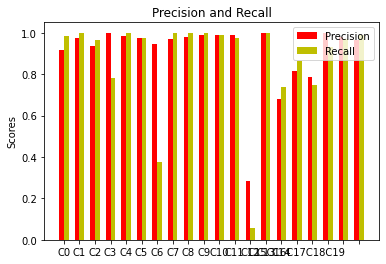

In [36]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(input_test, label_test, batch_size=512)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

import numpy as np

metrics = np.array(loss_and_metrics[2:42])
idx = np.linspace(0, 39, num=40) 
precision = metrics[(idx % 2) == 0]
recall = metrics[((idx+1) % 2) == 0]

import matplotlib.pyplot as plt

N = 20
ind = np.arange(N)
width = 0.3

fig, ax = plt.subplots()
prec_bar = ax.bar(ind, precision, width, color='r')
recall_bar = ax.bar(ind + width, recall, width, color='y')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15' 'C16' 'C17' 'C18' 'C19'))

ax.legend((prec_bar[0], recall_bar[0]), ('Precision', 'Recall'))

plt.show()

In [35]:
print("loss : ", loss_and_metrics[0])
print("acc : ", loss_and_metrics[1],'\n')
print("불필요정보 정밀도 : ", loss_and_metrics[2])
print("불필요정보 재현율 : ", loss_and_metrics[3],'\n')
print("브랜드 정밀도 : ", loss_and_metrics[4])
print("브랜드 재현율 : ", loss_and_metrics[5],'\n')
print("주소 정밀도 : ", loss_and_metrics[6])
print("주소 재현율 : ", loss_and_metrics[7],'\n')
print("사업자등록번호 정밀도 : ", loss_and_metrics[8])
print("사업자등록번호 재현율 : ", loss_and_metrics[9],'\n')
print("구매일시 정밀도 : ", loss_and_metrics[10])
print("구매일시 재현율 : ", loss_and_metrics[11],'\n')
print("상품명 정밀도 : ", loss_and_metrics[12])
print("상품명 재현율 : ", loss_and_metrics[13],'\n')
print("상품바코드 정밀도 : ", loss_and_metrics[14])
print("상품바코드 재현율 : ", loss_and_metrics[15],'\n')
print("결제금액 정밀도 : ", loss_and_metrics[16])
print("결제금액 재현율 : ", loss_and_metrics[17],'\n')
print("카드금액 정밀도 : ", loss_and_metrics[18])
print("카드금액 재현율 : ", loss_and_metrics[19],'\n')
print("카드번호 정밀도 : ", loss_and_metrics[20])
print("카드번호 재현율 : ", loss_and_metrics[21],'\n')
print("카드사명 정밀도 : ", loss_and_metrics[22])
print("카드사명 재현율 : ", loss_and_metrics[23],'\n')
print("카드승인번호 정밀도 : ", loss_and_metrics[24])
print("카드승인번호 재현율 : ", loss_and_metrics[25],'\n')
print("영수증 바코드 정밀도 : ", loss_and_metrics[26])
print("영수증 바코드 재현율 : ", loss_and_metrics[27],'\n')
print("결제방법 정밀도 : ", loss_and_metrics[28])
print("결제방법 재현율 : ", loss_and_metrics[29],'\n')
print("현금영수증 승인번호 정밀도 : ", loss_and_metrics[30])
print("현금영수증 승인번호 재현율 : ", loss_and_metrics[31],'\n')
print("지점명 정밀도 : ", loss_and_metrics[32])
print("지점명 재현율 : ", loss_and_metrics[33],'\n')
print("대표자명 정밀도 : ", loss_and_metrics[34])
print("대표자명 재현율 : ", loss_and_metrics[35],'\n')
print("전화번호 정밀도 : ", loss_and_metrics[36])
print("전화번호 재현율 : ", loss_and_metrics[37],'\n')
print("단가 및 금액 정밀도 : ", loss_and_metrics[38])
print("단가 및 금액 재현율 : ", loss_and_metrics[39],'\n')
print("수량 정밀도 : ", loss_and_metrics[40])
print("수량 재현율 : ", loss_and_metrics[41])

loss :  0.33171344218125737
acc :  0.9291518530971572 

불필요정보 정밀도 :  0.9161792321517541
불필요정보 재현율 :  0.9826622377379162 

브랜드 정밀도 :  0.9154900957207319
브랜드 재현율 :  0.9349923819197562 

주소 정밀도 :  0.8446769113768291
주소 재현율 :  0.8915330490647021 

사업자등록번호 정밀도 :  0.9349923819197562
사업자등록번호 재현율 :  0.7096326429871752 

구매일시 정밀도 :  0.9891653956950407
구매일시 재현율 :  1.0 

상품명 정밀도 :  0.9751488688998322
상품명 재현율 :  0.9708537212660495 

상품바코드 정밀도 :  0.9602989208401612
상품바코드 재현율 :  0.37771320488320925 

결제금액 정밀도 :  0.9696631094960164
결제금액 재현율 :  1.0 

카드금액 정밀도 :  0.9783307952648373
카드금액 재현율 :  1.0 

카드번호 정밀도 :  0.9907131979706446
카드번호 재현율 :  1.0 

카드사명 정밀도 :  0.9907131979706446
카드사명 재현율 :  0.9907131979706446 

카드승인번호 정밀도 :  0.9891653956950407
카드승인번호 재현율 :  0.9783307952648373 

영수증 바코드 정밀도 :  0.19502285424073135
영수증 바코드 재현율 :  0.04782703432593629 

결제방법 정밀도 :  1.0
결제방법 재현율 :  1.0 

현금영수증 승인번호 정밀도 :  0.4528864080255682
현금영수증 승인번호 재현율 :  0.5200609446419502 

지점명 정밀도 :  0.8307818853049911
지점명 재현율 :  0.8400

테스트 데이터에 대한 정확도가 아니며 훈련 데이터도 양이 적어서 정확도에 의미는 없지만, 여기서 말하고자 하는 점은 현재 각 단어들의 임베딩 벡터들의 값은 학습 과정에서 다른 가중치들과 함께 학습된 값입니다.

+ 테스트 시 배치 사이즈를 512까지 늘렸더니 재현율과 정밀도가 평균적으로 90% 넘습니다. 제 생각엔 믿을 수 없는 결과입니다. 
일반적으로 배치사이즈가 1이면 문제가 100개일 때 한문제를 풀고 답을 맞추고, 가중치를 갱신하고 다음 문제를 풀겠다는 의미입니다. 따라서 
배치사이즈가 작을수록 가중치 갱신이 자주 일어납니다.
03.17 model.fit()의 배치사이즈부터 1, 128, 512 순으로 조정하여 실험해보겠습니다.

## 모델 저장하고 불러오기

In [0]:
# 라이브러리 임포트
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
import pandas as pd

In [0]:
# 모델을 json형식으로 만들어서 저장
model_json = model.to_json()
with open("/content/drive/My Drive/캐시카우_노하람인턴_공유폴더/OCR result text Classification/cnn_512_model.json", "w") as json_file : 
    json_file.write(model_json)

In [40]:
# 가중치를 h5 포맷으로 만들어서 저장
model.save_weights("/content/drive/My Drive/캐시카우_노하람인턴_공유폴더/OCR result text Classification/Text_multi_classfication_with_CNN_haram.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# 저장된 json파일로부터 모델 불러오기
from keras.models import model_from_json 
json_file = open("model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
loaded_model = model_from_json(loaded_model_json)

In [0]:
# 로드한 모델에 가중치 로드하기
loaded_model.load_weights("Text_multi_classfication_with_CNN_haram.h5") 
print("Loaded model from disk")

Loaded model from disk


3939/3939 [==============================] - 1s 298us/step
## evaluation loss and_metrics ##
[0.39685104670455595, 0.9207920796618785, 0.9074779812622021, 0.9806220623617035, 1.0, 1.0, 0.9487930301725335, 0.9239806597321795, 0.9814311112507735, 0.8264090981420511, 0.9566725929184715, 0.9458407430849756, 0.9766833771906337, 0.9691964191178678, 0.9651833326267573, 0.34631136571220045, 0.9837522213759837, 1.0, 0.9287563905585202, 0.9891681501665041, 0.9546295296543593, 0.959767403836237, 1.0, 0.9855575309728238, 0.9837522213759837, 0.9632748567262075, 0.4150799734091874, 0.07573213127322777, 0.9927787616126397, 1.0, 0.5450621985275451, 0.6100533130236101, 0.7794944296394033, 0.8673098027388376, 0.8526094411950209, 0.6226569819069054, 0.9638938235582873, 0.9337709595873199, 0.9523344061858281, 0.9820992018886555, 0.8909462286936326, 1.0]


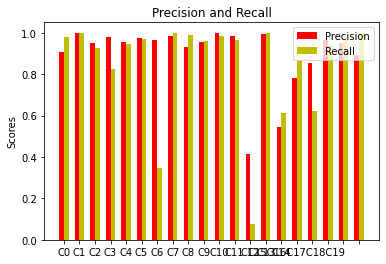

In [0]:
# 모델 컴파일 후 평가하기
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy',
                       single_class_precision(0), single_class_recall(0),
                       single_class_precision(1), single_class_recall(1),
                       single_class_precision(2), single_class_recall(2),
                       single_class_precision(3), single_class_recall(3),
                       single_class_precision(4), single_class_recall(4),
                       single_class_precision(5), single_class_recall(5),
                       single_class_precision(6), single_class_recall(6),
                       single_class_precision(7), single_class_recall(7),
                       single_class_precision(8), single_class_recall(8),
                       single_class_precision(9), single_class_recall(9),
                       single_class_precision(10), single_class_recall(10),
                       single_class_precision(11), single_class_recall(11),
                       single_class_precision(12), single_class_recall(12),
                       single_class_precision(13), single_class_recall(13),
                       single_class_precision(14), single_class_recall(14),
                       single_class_precision(15), single_class_recall(15),
                       single_class_precision(16), single_class_recall(16),
                       single_class_precision(17), single_class_recall(17),
                       single_class_precision(18), single_class_recall(18),
                       single_class_precision(19), single_class_recall(19)])

# model evaluation
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(input_test, label_test, batch_size=512)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

import numpy as np

metrics = np.array(loss_and_metrics[2:42])
idx = np.linspace(0, 39, num=40) 
precision = metrics[(idx % 2) == 0]
recall = metrics[((idx+1) % 2) == 0]

import matplotlib.pyplot as plt

N = 20
ind = np.arange(N)
width = 0.3

fig, ax = plt.subplots()
prec_bar = ax.bar(ind, precision, width, color='r')
recall_bar = ax.bar(ind + width, recall, width, color='y')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15' 'C16' 'C17' 'C18' 'C19'))

ax.legend((prec_bar[0], recall_bar[0]), ('Precision', 'Recall'))

plt.show()

In [0]:
model.save('Text_multi_classfication_with_CNN_haram.h5')

In [0]:
!ls

drive  sample_data  Text_multi_classfication_with_CNN_haram.h5


In [0]:
from keras.models import load_model
model = load_weights('Text_multi_classfication_with_CNN_haram.h5')

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 45, 128)           1727232   
_________________________________________________________________
dropout_5 (Dropout)          (None, 45, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 43, 256)           98560     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)               

### 테스트 데이터 전처리

In [0]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거. + 영어 소문자, 대문자, 숫자도 제외
    # 일단 OCR 결과의 원형을 학습시키기 위해 정규표현식을 사용하지 않고 학습시켜보겠습니다.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\\s]", " ",  review)
    #review_text = re.sub(" ", "",  review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
   
    return word_review

In [42]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', 
              '주', '등', '한', '(', ')', '/', '*', '=', 'E', '|', '-', '.', ',', 'II', 'لالالالا', 
              '|||||||||', 'iii', '|||', '. ', '.', '"', ' )', '[', ']']
okt = Okt()
clean_test_review = []

for review in tqdm(test_data['document']):
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

100%|██████████| 2042/2042 [00:01<00:00, 1871.30it/s]


In [0]:
sentences = clean_test_review

In [44]:
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

1659


In [46]:
test_encoded = t.texts_to_sequences(sentences)
print(test_encoded)

[[34, 48, 530, 144], [531, 282, 532, 533, 534, 234], [3, 135], [535, 132, 131, 64, 123, 536, 148], [95, 45, 102, 155, 142, 235, 90, 136, 537, 538, 539], [24, 65, 54, 66, 39, 91, 67, 85], [1, 31, 96, 4, 236, 8, 75, 92, 38, 76], [21, 56, 173, 4, 49, 10, 68, 77, 26, 14, 57, 17, 540, 8, 19], [38, 196], [9, 8, 21, 78, 49, 11, 541, 542, 9], [5], [29, 1, 10, 32, 1, 27, 17, 86, 4], [110, 29, 1, 10, 32, 1, 27, 58, 26, 14], [19, 11, 20, 5, 69, 7, 22, 6, 79], [1, 50, 9], [70, 80, 71, 14, 5, 1, 4, 13], [25, 28, 6, 1, 4, 13], [119, 137, 138, 10], [15, 97, 24, 59], [6, 42], [72, 60, 7], [3, 543, 352, 544, 545, 546, 547, 115, 111], [548, 237, 12, 3, 139, 12], [6, 124, 116, 87, 23, 46, 549, 55, 23], [25, 28, 81, 51, 61, 52, 13], [82, 62, 168, 209], [46, 43, 40, 105, 210], [31, 73, 139, 12], [63, 2, 133, 550], [98, 353], [551, 354, 552, 553, 139, 12], [33, 7, 353], [156, 283, 128, 3, 554, 555], [211, 122, 355], [33, 18, 556, 284, 238], [285, 286, 117, 34, 99, 2, 16, 35], [106, 18, 557], [36, 2], [37, 2

In [47]:
test=pad_sequences(test_encoded, maxlen=45, padding='post')
print(test[1])
# 테스트 데이터의 패딩작업(훈련을 45개의 단어길이로 했으니 테스트 데이터를 예측할 때도 45개의 문장길리로 맞추어주어야한다.)

[531 282 532 533 534 234   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0]


In [48]:
model.predict_classes(test)
#model.predict_classes(input_test)

array([0, 2, 0, ..., 0, 0, 0])

In [49]:
test_data = pd.read_csv(test_file_link, header = 0, delimiter = '\t', quoting = 3)
test_data.head(10)

,id,document,label
0,1.0,CJ올리브영 신사점,NaN
1,2.0,특별시 강남구 도산대로 116 논현빌딩,NaN
2,3.0,1층,NaN
3,4.0,"""0098101574 구창근 , TEL : 02 -516 - 5290""",NaN
4,5.0,2019 - 12-31 21 : 15 : 54 POS : 1001- 00255 문준휘,NaN
5,6.0,고객센터 : 1577 - 4887 www .oliveyoung . co .kr,NaN
6,7.0,교환 판매가능한 / 환불은정상 결제일로부터 ( 15일(1월,NaN
7,8.0,*수단과 다 환불 구매영수증 미개봉 지참 후) 에 이해 결제했던,NaN
8,9.0,15일 ) 대,NaN
9,10.0,가능 / 결제수단 변경은 구매매장 깨진 모시 가능,NaN


In [51]:
test_data['label'] = model.predict_classes(test)
test_data[10:30]

,id,document,label
10,11.0,시,0
11,12.0,* 부분 교환 영수증/ 선물교환증에 의한 환불은,0
12,13.0,불가하며 부분교환 영수증/ 선물 교환증을 지참,0
13,14.0,하여 매장 방문 시 해당금액 이상의 상품으로,0
14,15.0,교환만 가능,0
15,16.0,* 증정품 미지참 시 교환/ 환불 불가,0
16,17.0,* 클리어런스 상품은 교환/ 환불 불가,0
17,18.0,[ 재 발 행 영수증],15
18,19.0,카드전표( 고객용 ),0
19,20.0,상품명,7


# 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding) 사용하기

임베딩 벡터를 얻기 위해서 케라스의 Embedding()을 사용하기도 하지만, 때로는 이미 훈련되어져 있는 워드 임베딩을 불러서 이를 임베딩 벡터로 사용하기도 합니다. 훈련 데이터가 적은 상황이라면 모델에 케라스의 Embedding()을 사용하는 것보다 다른 텍스트 데이터로 사전 훈련되어 있는 임베딩 벡터를 불러오는 것이 나은 선택일 수 있습니다.

훈련 데이터가 적다면 케라스의 Embedding()으로 해당 문제에 충분히 특화된 임베딩 벡터를 만들어내는 것이 쉽지 않습니다. 차라리 해당 문제에 특화된 임베딩 벡터를 만드는 것이 어렵다면, 해당 문제에 특화된 것은 아니지만 보다 일반적이고 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다.

사전 훈련된 GloVe와 Word2Vec 임베딩을 사용해서 모델을 훈련시키는 실습을 진행해봅시다.

GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip

Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

훈련 데이터는 앞서 사용했던 데이터에 동일한 전처리가 수행된 상태라고 가정하겠습니다.

In [52]:
print(X_train)

[[ 4500   153   548 ...     0     0     0]
 [  824  2906     0 ...     0     0     0]
 [ 2907     0     0 ...     0     0     0]
 ...
 [12298     0     0 ...     0     0     0]
 [12299     0     0 ...     0     0     0]
 [12300     0     0 ...     0     0     0]]


In [53]:
print(y_train)

[ 2 16 16 ... 12 12 12]


## 1) 사전 훈련된 GloVe 사용하기

이제 임베딩 층을 설계하기 위한 과정부터 달라집니다. 우선 다운로드 받은 파일인 glove.6B.zip의 압축을 풀면 그 안에 4개의 파일이 있는데 여기서 사용할 파일은 glove.6B.100d.txt 파일입니다. 해당 파일은 하나의 줄당 101개의 값을 가지는 리스트를 갖고 있습니다. 두 개의 줄만 읽어보도록 하겠습니다.

[꿀팁]Colab에서 구글 드라이브 마운트를 통해 파일 가져오기
Colab에서 구글 드라이브 API를 통해 굳이 연결하지 않더라도,
Colab 왼쪽 상단을 보면 폴더 모양의 아이콘이 있습니다. 이를 클릭하고
드라이브 마운트를 통해 계정에 연결해놓으면 개인 구글 드라이브에 있는 폴더들이 나타납니다.
이 중 content/drive/Mydrive/ 로 들어가면 자신의 구글 드라이브에 있는 폴더와 파일들이 나타납니다.
사용하고자 하는 파일을 우클릭하고 경로를 복사하면
f = open('복사한 경로 붙여넣기')를 통해
간편하게 사용할 수 있습니다.

In [57]:
n=0
f = open('/content/drive/My Drive/datt/glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
    print(word_vector) # 각 줄을 출력
    word = word_vector[0] # word_vector에서 첫번째 값만 저장
    print(word) # word_vector의 첫번째 값만 출력
    n=n+1
    if n==2:
        break
f.close()

['the', '-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172', '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459', '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231', '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336', '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971', '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722', '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397', '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531', '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477', '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205', '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167', '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079', '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044', '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972', '0.15006', '-0.53212', '-0.2055', '-1.2526', '0.071624', '0.70565', '0.49744', '-0.42063', '0.26148', '-1.538', '-0.30223

In [58]:
print(type(word_vector))
print(len(word_vector))

<class 'list'>
101


101개의 값 중에서 첫번째 값은 임베딩 벡터가 의미하는 단어를 의미하며, 
두번째 값부터 마지막 값은 해당 단어의 임베딩 벡터의 100개의 차원에서의 각 값을 의미합니다. 

즉, glove.6B.100d.txt는 수많은 단어에 대해서 100개의 차원을 가지는 임베딩 벡터로 제공하고 있습니다. 

위의 출력 결과는 단어 'the'에 대해서 100개의 차원을 가지는 임베딩 벡터와 단어 ','에 대해서 100개의 차원을 가지는 임베딩 벡터를 보여줍니다. 

그러면 이제 glove.6B.100d.txt에 있는 모든 임베딩 벡터들을 불러와보겠습니다. 

형식은 키(key)와 값(value)의 쌍(pair)를 가지는 파이썬의 사전형 구조를 사용합니다.

In [60]:
import numpy as np
embedding_dict = dict()
f = open('/content/drive/My Drive/datt/glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


임의의 단어 'respectable'에 대해서 임베딩 벡터를 출력해봅니다.

In [111]:
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

벡터값이 출력되며 길이는 100인 것을 확인할 수 있습니다.

In [112]:
embedding_matrix = np.zeros((vocab_size, 100))
# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

(12301, 100)

In [113]:
print(t.word_index.items())

dict_items([('교환', 1), ('포인트', 2), ('환불', 3), ('시', 4), ('상품', 5), ('결제', 6), ('영수증', 7), ('금액', 8), ('1', 9), ('가능', 10), ('매장', 11), ('불가', 12), ('차다', 13), ('카드', 14), ('내', 15), ('번호', 16), ('에', 17), ('000', 18), ('하다', 19), ('품목', 20), ('방문', 21), ('클리어', 22), ('이상', 23), ('런스', 24), ('증', 25), ('수단', 26), ('부분', 27), ('지다', 28), ('역', 29), ('선물', 30), ('고객', 31), ('적립', 32), ('가용', 33), ('승인', 34), ('판매', 35), ('cj', 36), ('www', 37), ('2', 38), ('가다', 39), ('세', 40), ('명', 41), ('부', 42), ('3', 43), ('할인', 44), ('로', 45), ('쿠폰', 46), ('매', 47), ('면세', 48), ('구', 49), ('합계', 50), ('제휴', 51), ('0', 52), ('행사', 53), ('15일', 54), ('해당', 55), ('을', 56), ('중복', 57), ('구매', 58), ('900', 59), ('매가', 60), ('수량', 61), ('1577', 62), ('변경', 63), ('미개', 64), ('미지', 65), ('표시', 66), ('cjone', 67), ('계', 68), ('co', 69), ('단가', 70), ('품', 71), ('증정', 72), ('한해', 73), ('올리브영', 74), ('과세', 75), ('일로', 76), ('과', 77), ('의하다', 78), ('후', 79), ('용', 80), ('일', 81), ('4887', 82), ('02', 83), ('봉', 

In [0]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어를 1개씩 꺼내온다.
    temp = embedding_dict.get(word) # 단어(key) 해당되는 임베딩 벡터의 100개의 값(value)를 임시 변수에 저장
    if temp is not None:
        embedding_matrix[i] = temp # 임수 변수의 값을 단어와 맵핑되는 인덱스의 행에 삽입

이제 훈련 데이터의 단어 집합의 모든 단어에 대해서 사전 훈련된 GloVe의 임베딩 벡터들을 맵핑하였습니다. 이제 이를 이용하여 임베딩 층(embedding layer)를 만들어보겠습니다.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=True)
#e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)

현재 실습에서 사전 훈련된 워드 임베딩을 100차원의 값인 것으로 사용하고 있기 때문에 임베딩 층의 output_dim의 인자값으로 100을 주어야 합니다. 그리고 사전 훈련된 워드 임베딩을 그대로 사용할 것이므로, 별도로 더 이상 훈련을 하지 않는다는 옵션을 줍니다. 이는 trainable=False로 선택할 수 있습니다.

## 모델 생성

In [0]:
# 특정 클래스에 대한 정밀도
def single_class_precision(interesting_class_id):
    def prec(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1) # y_true: 실제 값, 티아노 및 텐스플로우의 텐서(tensor)
        class_id_pred = K.argmax(y_pred, axis=-1) # y_pred: 예측 값, 티아노 및 텐스플로우의 텐서(tensor)
        precision_mask = K.cast(K.equal(class_id_pred, interesting_class_id), 'int32')
        class_prec_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * precision_mask
        class_prec = K.cast(K.sum(class_prec_tensor), 'float32') / K.cast(K.maximum(K.sum(precision_mask), 1), 'float32')
        return class_prec
    return prec

In [0]:
# 특정 클래스에 대한 재현율
def single_class_recall(interesting_class_id):
    def recall(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        recall_mask = K.cast(K.equal(class_id_true, interesting_class_id), 'int32')
        class_recall_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * recall_mask
        class_recall = K.cast(K.sum(class_recall_tensor), 'float32') / K.cast(K.maximum(K.sum(recall_mask), 1), 'float32')
        return class_recall
    return recall

In [146]:
model = Sequential()
model.add(Embedding(vocab_size, 256, weights=[embedding_matrix], input_length=max_len, trainable=True)) # 배치사이즈가 기존(128)보다 2배 커지면 어떻게 될까? => 
#model.add(Flatten()) # Dense의 입력으로 넣기위함.
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='softmax'))

ValueError: ignored

In [0]:
model = Sequential()
model.add(e) 
model.add(Flatten()) # Dense의 입력으로 넣기위함.
model.add(Dense(128, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [119]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 45, 100)           1230100   
_________________________________________________________________
flatten_9 (Flatten)          (None, 4500)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               576128    
_________________________________________________________________
dense_12 (Dense)             (None, 20)                2580      
Total params: 1,808,808
Trainable params: 1,808,808
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy',
                       single_class_precision(0), single_class_recall(0),
                       single_class_precision(1), single_class_recall(1),
                       single_class_precision(2), single_class_recall(2),
                       single_class_precision(3), single_class_recall(3),
                       single_class_precision(4), single_class_recall(4),
                       single_class_precision(5), single_class_recall(5),
                       single_class_precision(6), single_class_recall(6),
                       single_class_precision(7), single_class_recall(7),
                       single_class_precision(8), single_class_recall(8),
                       single_class_precision(9), single_class_recall(9),
                       single_class_precision(10), single_class_recall(10),
                       single_class_precision(11), single_class_recall(11),
                       single_class_precision(12), single_class_recall(12),
                       single_class_precision(13), single_class_recall(13),
                       single_class_precision(14), single_class_recall(14),
                       single_class_precision(15), single_class_recall(15),
                       single_class_precision(16), single_class_recall(16),
                       single_class_precision(17), single_class_recall(17),
                       single_class_precision(18), single_class_recall(18),
                       single_class_precision(19), single_class_recall(19)])

In [121]:
model.fit(input_train, label_train, epochs=15, verbose=1, validation_data=(input_val, label_val)) # validation_data는 각 훈련마다 결과값을 도출할 측정 데이터를 의미한다. 따라서 가중치 업데이트는 되지 않는다.

Train on 30000 samples, validate on 5433 samples
Epoch 1/15
30000/30000 [==============================] - 18s 597us/sample - loss: 0.5096 - acc: 0.8545 - prec: 0.3781 - recall: 0.3845 - val_loss: 0.2808 - val_acc: 0.9157 - val_prec: 0.4809 - val_recall: 0.5029
Epoch 2/15
30000/30000 [==============================] - 18s 590us/sample - loss: 0.1777 - acc: 0.9488 - prec: 0.4239 - recall: 0.4354 - val_loss: 0.2346 - val_acc: 0.9203 - val_prec: 0.4912 - val_recall: 0.5029
Epoch 3/15
30000/30000 [==============================] - 18s 595us/sample - loss: 0.0695 - acc: 0.9859 - prec: 0.4416 - recall: 0.4477 - val_loss: 0.2625 - val_acc: 0.9210 - val_prec: 0.4833 - val_recall: 0.5044
Epoch 4/15
30000/30000 [==============================] - 18s 591us/sample - loss: 0.0347 - acc: 0.9919 - prec: 0.4430 - recall: 0.4456 - val_loss: 0.2777 - val_acc: 0.9216 - val_prec: 0.4912 - val_recall: 0.4912
Epoch 5/15
30000/30000 [==============================] - 18s 591us/sample - loss: 0.0243 - acc: 0.

In [144]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(input_test, label_test, batch_size=256)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

3938/3938 [==============================] - 0s 29us/sample - loss: 0.5035 - acc: 0.9233 - prec: 0.9051 - recall: 0.9896
## evaluation loss and_metrics ##
[0.5034571651609614, 0.92331135, 0.9050595, 0.9895833]


In [140]:
model.predict_classes(input_data)

array([ 2, 16, 16, ..., 12, 12, 12])

In [0]:
train_data['label'] = model.predict_classes(input_data)

In [142]:
train_data[25010:25020]

,id,document,label
25010,25015,| 상품명 단가 수량 금액,0
25011,25016,1) 에라 잉크 .,5
25012,25017,100 100,18
25013,25018,8806102876787,0
25014,25019,1) 어라운 선인장 대지 매기행시,5
25015,25020,100 100,18
25016,25021,8806080066286,6
25017,25022,| 상품명 단가 수량 금액,0
25018,25023,| 상품명 단가 수량 금액,0
25019,25024,| 상품명 단가 수량 금액,0


In [137]:
!pip install xlsxwriter

     |████████████████████████████████| 143kB 4.9MB/s 


In [0]:
dataframe = pd.DataFrame(train_data)
dataframe.to_excel("/content/drive/My Drive/text/GloVeEmbedding_result(1024).xlsx", engine='xlsxwriter', index=False)

## 결과 보고

loss_and_metrics = model.evaluate(input_test, label_test, batch_size=256)
- 모델 평가에서의 배치사이즈를 256, 512로 설정하여 정답레이블-예측레이블 오차를 측장하여 비교해봤으나, 둘 다 39371개 중 810를 잘못 예측하였습니다. 
- 배치 사이즈가 1일 경우, 128일 경우 정밀도와 재현율이 현저하게 떨어졌습니다.
- 256, 512의 경우 완벽하게 정확하게 예측이 일치하는 것으로 보아, 과대적합이 발생하여 훈련데이터에 적응해버린 것이 아닌가 추측됩니다. 
-- 잘못 생각한 것이었습니다. 평가층에서 배치 사이즈를 변경한다고하여, 이미 훈련된 모델로 predict할 땐 전혀 영향을 끼치지 않습니다. 단치 배치 사이즈에 따른 모델을 평가하는 인자인 것 같습니다. 
-- 따라서 평가에서의 배치 사이즈가 아닌 glove 임베딩 층의 차원을 변경하여 어떤 결과가 나오는지 확인해보곘습니다.
- 일반적인 자체 데이터셋으로 임베딩층을 설정했을 때와, Pre-Trained GloVe 임베딩 층을 사용했을 때 결과가 별반 다르지 않았습니다.

## 추가 검사 방안
위의 코드는 glove.100d 파일을 이용하여 100차원의 임베딩 층을 생성하였습니다.
glove.300d 파일을 이용하여 300차원의 임베딩 층을 사용하여 차이가 있는지 확인해보곘습니다.

In [147]:
import numpy as np
embedding_dict = dict()
f = open('/content/drive/My Drive/datt/glove.6B.300d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 300개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [148]:
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-5.9430e-02  2.9373e-01  4.4671e-01  2.4423e-01 -1.5634e-01  2.8773e-01
  6.7747e-02  2.0504e-01  4.1492e-02 -3.0522e-01 -4.3004e-02  2.8197e-01
  6.2618e-02  5.0430e-01 -4.0581e-01 -1.4415e-01 -2.9910e-01  7.0448e-02
 -5.3740e-02 -6.1705e-01 -3.9854e-01 -9.5942e-02  1.0248e-02  5.4411e-01
  1.7266e-01  8.3997e-02  2.8430e-01  1.0357e-01  4.8725e-01  4.5660e-01
 -6.1109e-01  6.4805e-02 -7.0994e-03 -3.6287e-01 -7.9061e-01  3.7435e-01
 -9.2787e-02  4.0281e-01  2.4042e-01 -9.2453e-02  4.7018e-01  5.6912e-01
  6.5189e-02 -4.7954e-01  1.9341e-01  3.4634e-01  2.8264e-01  6.5834e-04
  2.4984e-01  1.0720e-01 -3.6387e-01 -1.6954e-01  2.0574e-01 -1.0885e-03
  2.1150e-01 -1.2830e-01  2.5518e-01 -1.4915e-01 -1.8501e-01 -6.8867e-02
 -2.6199e-01 -3.7595e-01  1.6882e-01  3.7629e-01  1.4882e-01  6.5637e-02
  5.7059e-01 -3.5715e-01  2.4602e-01  1.8475e-01 -7.2171e-02 -3.9930e-01
 -1.2116e-01 -6.8676e-02 -7.9098e-02  4.4554e-02 -3.2147e-01 -5.8227e-04
  1.3248e-01  2.3804e-01 -6.5126e-01  4.4838e-02 -9

In [149]:
embedding_matrix = np.zeros((vocab_size, 300))
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

(12301, 300)

In [150]:
print(t.word_index.items())

dict_items([('교환', 1), ('포인트', 2), ('환불', 3), ('시', 4), ('상품', 5), ('결제', 6), ('영수증', 7), ('금액', 8), ('1', 9), ('가능', 10), ('매장', 11), ('불가', 12), ('차다', 13), ('카드', 14), ('내', 15), ('번호', 16), ('에', 17), ('000', 18), ('하다', 19), ('품목', 20), ('방문', 21), ('클리어', 22), ('이상', 23), ('런스', 24), ('증', 25), ('수단', 26), ('부분', 27), ('지다', 28), ('역', 29), ('선물', 30), ('고객', 31), ('적립', 32), ('가용', 33), ('승인', 34), ('판매', 35), ('cj', 36), ('www', 37), ('2', 38), ('가다', 39), ('세', 40), ('명', 41), ('부', 42), ('3', 43), ('할인', 44), ('로', 45), ('쿠폰', 46), ('매', 47), ('면세', 48), ('구', 49), ('합계', 50), ('제휴', 51), ('0', 52), ('행사', 53), ('15일', 54), ('해당', 55), ('을', 56), ('중복', 57), ('구매', 58), ('900', 59), ('매가', 60), ('수량', 61), ('1577', 62), ('변경', 63), ('미개', 64), ('미지', 65), ('표시', 66), ('cjone', 67), ('계', 68), ('co', 69), ('단가', 70), ('품', 71), ('증정', 72), ('한해', 73), ('올리브영', 74), ('과세', 75), ('일로', 76), ('과', 77), ('의하다', 78), ('후', 79), ('용', 80), ('일', 81), ('4887', 82), ('02', 83), ('봉', 

In [0]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어를 1개씩 꺼내온다.
    temp = embedding_dict.get(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None:
        embedding_matrix[i] = temp # 임수 변수의 값을 단어와 맵핑되는 인덱스의 행에 삽입

In [0]:
# 특정 클래스에 대한 정밀도
def single_class_precision(interesting_class_id):
    def prec(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1) # y_true: 실제 값, 티아노 및 텐스플로우의 텐서(tensor)
        class_id_pred = K.argmax(y_pred, axis=-1) # y_pred: 예측 값, 티아노 및 텐스플로우의 텐서(tensor)
        precision_mask = K.cast(K.equal(class_id_pred, interesting_class_id), 'int32')
        class_prec_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * precision_mask
        class_prec = K.cast(K.sum(class_prec_tensor), 'float32') / K.cast(K.maximum(K.sum(precision_mask), 1), 'float32')
        return class_prec
    return prec

In [0]:
# 특정 클래스에 대한 재현율
def single_class_recall(interesting_class_id):
    def recall(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        recall_mask = K.cast(K.equal(class_id_true, interesting_class_id), 'int32')
        class_recall_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * recall_mask
        class_recall = K.cast(K.sum(class_recall_tensor), 'float32') / K.cast(K.maximum(K.sum(recall_mask), 1), 'float32')
        return class_recall
    return recall

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [0]:
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=True)) # 배치사이즈가 기존(128)보다 2배 커지면 어떻게 될까? => 
#model.add(Flatten()) # Dense의 입력으로 넣기위함.
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy',
                       single_class_precision(0), single_class_recall(0),
                       single_class_precision(1), single_class_recall(1),
                       single_class_precision(2), single_class_recall(2),
                       single_class_precision(3), single_class_recall(3),
                       single_class_precision(4), single_class_recall(4),
                       single_class_precision(5), single_class_recall(5),
                       single_class_precision(6), single_class_recall(6),
                       single_class_precision(7), single_class_recall(7),
                       single_class_precision(8), single_class_recall(8),
                       single_class_precision(9), single_class_recall(9),
                       single_class_precision(10), single_class_recall(10),
                       single_class_precision(11), single_class_recall(11),
                       single_class_precision(12), single_class_recall(12),
                       single_class_precision(13), single_class_recall(13),
                       single_class_precision(14), single_class_recall(14),
                       single_class_precision(15), single_class_recall(15),
                       single_class_precision(16), single_class_recall(16),
                       single_class_precision(17), single_class_recall(17),
                       single_class_precision(18), single_class_recall(18),
                       single_class_precision(19), single_class_recall(19)])

In [158]:
model.fit(input_train, label_train, epochs=15, verbose=1, validation_data=(input_val, label_val)) # validation_data는 각 훈련마다 결과값을 도출할 측정 데이터를 의미한다. 따라서 가중치 업데이트는 되지 않는다.

Train on 30000 samples, validate on 5433 samples
Epoch 1/15
30000/30000 [==============================] - 109s 4ms/step - loss: 0.4928 - acc: 0.8593 - prec: 0.8902 - recall: 0.9623 - prec_1: 0.3618 - recall_1: 0.3589 - prec_2: 0.3540 - recall_2: 0.3511 - prec_3: 0.1925 - recall_3: 0.1786 - prec_4: 0.3989 - recall_4: 0.4010 - prec_5: 0.6124 - recall_5: 0.6062 - prec_6: 0.2717 - recall_6: 0.3559 - prec_7: 0.3100 - recall_7: 0.3086 - prec_8: 0.2908 - recall_8: 0.2913 - prec_9: 0.3255 - recall_9: 0.3233 - prec_10: 0.3466 - recall_10: 0.3415 - prec_11: 0.3366 - recall_11: 0.3388 - prec_12: 0.0181 - recall_12: 0.0141 - prec_13: 0.3403 - recall_13: 0.3316 - prec_14: 0.0395 - recall_14: 0.0395 - prec_15: 0.1746 - recall_15: 0.1694 - prec_16: 0.2697 - recall_16: 0.2405 - prec_17: 0.3732 - recall_17: 0.3676 - prec_18: 0.6786 - recall_18: 0.6842 - prec_19: 0.3858 - recall_19: 0.3929 - val_loss: 0.2254 - val_acc: 0.9310 - val_prec: 0.9758 - val_recall: 0.9677 - val_prec_1: 0.4094 - val_recall_1: 

In [160]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(input_test, label_test, batch_size=512)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

3938/3938 [==============================] - 1s 348us/step
## evaluation loss and_metrics ##
[0.2895849857492578, 0.9446419508037015, 0.9827749586880298, 0.9711916192102215, 0.9814263959412892, 0.9783307913900814, 0.9523325854900102, 0.9428861588012634, 1.0, 0.7809862453602122, 0.9855538635098916, 1.0, 0.9732746455559215, 0.9645044298690245, 0.5636000827734333, 0.9656083478486859, 0.9727345257921834, 0.9744612895758277, 0.9783307913900814, 1.0, 0.9891653995697967, 1.0, 1.0, 0.9899988285837711, 0.9869984732841465, 0.9739969543178049, 0.3250380904012189, 0.05515797965232341, 1.0, 1.0, 0.7107499618104051, 0.6934145980222749, 0.9479939008860978, 0.8472602421889879, 0.7468640114099862, 0.7237657512911326, 0.9674961909598782, 0.9415554126063357, 0.9759704231489365, 0.9823050912168803, 0.96375641207092, 0.9899988285837711]


In [0]:
#model.predict_classes(input_data)
train_data['label'] = model.predict_classes(input_data)

In [0]:
dataframe = pd.DataFrame(train_data)
dataframe.to_excel("/content/drive/My Drive/text/GloVeEmbedding_result(glove300d).xlsx", engine='xlsxwriter', index=False)

에측값을 label로 삽입한 엑셀 파일을 다운받아, 가지고 잇던 정답 레이블과 비교해보니 39370개 데이터 중 541개 데이터(문장) 예측에 실패했습니다. 
무려 98.65586%의 예측 정확도를 가지고 있습니다!
- 이미 정상적으로 각 레이블에 적합하도록 사전작업을 거친 데이터로 확인한 결과라, OCR 결과 텍스트를 그대로 사용할 경우의 정확도라고 말할 수 없습니다.

# 사전 훈련된 Word2Vec 사용하기

In [0]:
import numpy as np
import gensim

In [0]:
# 현재 위치에 구글의 사전 훈련된 Word2Vec을 다운로드
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [0]:
# 구글의 사전 훈련된 Word2vec 모델을 로드합니다.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)  

구글의 사전 훈련된 Word2Vec 모델을 로드하여 word2vec_model에 저장합니다.

In [0]:
print(word2vec_model.vectors.shape) # 모델의 크기 확인

300의 차원을 가진 Word2Vec 벡터가 3,000,000개 있습니다.

In [0]:
embedding_matrix = np.zeros((vocab_size, 300)) #vocab_size는 맨 앞에서 데이터를 불러와 토크나이징 후 vocab_size를 추출한 값입니다. 안했다면 확인 후 실행시켜와야합니다.
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

모든 값이 0으로 채워진 임베딩 행렬을 만들어줍니다. 이번 문제의 단어는 총 16개이므로, 16 × 300의 크기를 가진 행렬을 만듭니다.

In [0]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

word2vec_model에서 특정 단어를 입력하면 해당 단어의 임베딩 벡터를 리턴받을텐데, 만약 word2vec_model에 특정 단어의 임베딩 벡터가 없다면 None을 리턴하도록 합니다.

In [0]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # 해당 단어 위치의 행에 벡터의 값을 저장한다.

단어 집합으로부터 단어를 1개씩 호출하여 word2vec_model에 해당 단어의 임베딩 벡터값이 존재하는지 확인합니다. 만약 None이 아니라면 존재한다는 의미이므로 임베딩 행렬에 해당 단어의 인덱스 위치의 행에 임베딩 벡터의 값을 저장합니다. 이렇게 되면 현재 풀고자하는 문제의 16개의 단어와 맵핑되는 임베딩 행렬이 완성됩니다.

제대로 맵핑이 됐는지 확인해볼까요? 기존에 word2vec_model에 저장되어 있던 단어 'nice'의 임베딩 벡터값을 확인해봅시다

In [0]:
print(word2vec_model['nice'])

이 단어 'nice'는 현재 단어 집합에서 몇 번 인덱스를 가지는지 확인해보겠습니다.

In [0]:
print('단어 nice의 정수 인덱스 :', t.word_index['nice'])

1의 값을 가지므로 embedding_matirx의 1번 인덱스에는 단어 'nice'의 임베딩 벡터값이 있어야 합니다. 한 번 출력해봅시다.

In [0]:
print(embedding_matrix[1])

값이 word2vec_model에서 확인했던 것과 동일한 것을 확인할 수 있습니다. 단어 집합에 있는 다른 단어들에 대해서도 확인해보세요. 이제 Embedding에 사전 훈련된 embedding_matrix를 입력으로 넣어주고 모델을 학습시켜보겠습니다.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)